In [ ]:
#Natalie Sahadeo
#Artificial Intelligence
#November 23, 2022
#Research Project

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 25.1 MB/s 
     |████████████████████████████████| 141 kB 43.8 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 6.8 MB 38.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 636 kB 61.3 MB/s 
     |████████████████████████████████| 17.0 MB 45.6 MB/s 
     |████████████████████████████████| 167 kB 50.1 MB/s 
     |████████████████████████████████| 1.7 MB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 42.4 MB/s 
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 325 kB 72.3 MB/s 
     |████████████████████████████████| 

In [9]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [21]:
#Get the data
import pandas as pd
import io

white_wine_data = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']), delimiter=';')

#Convert data to a DataFrame
white_wine_data.head
white_wine_data_df = pd.DataFrame(white_wine_data)

#Preview the data
white_wine_data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [22]:
#Check the shape
white_wine_data_df.shape

(4898, 12)

In [23]:
#Picking out "Unseen" data
data = white_wine_data_df.sample(frac=0.9, random_state=786)
data_unseen = white_wine_data_df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4408, 12)
Unseen Data For Predictions: (490, 12)


In [19]:
!pip install numba==0.53


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 24.1 MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


In [24]:
#Setting up PyCaret environment
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'alcohol', session_id=123) 

,Description,Value
0,session_id,123
1,Target,alcohol
2,Original Data,"(4408, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3085, 17)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='alcohol',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [25]:
#Compare all models 
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2491,0.1151,0.3378,0.9231,0.0291,0.0237,0.167
rf,Random Forest Regressor,0.2563,0.1358,0.3673,0.9091,0.0315,0.0242,1.560
et,Extra Trees Regressor,0.2421,0.1376,0.3694,0.9079,0.0317,0.0229,1.246
lr,Linear Regression,0.2827,0.1390,0.3710,0.9070,0.0332,0.0272,0.393
br,Bayesian Ridge,0.2827,0.1390,0.3710,0.9070,0.0332,0.0272,0.016
lar,Least Angle Regression,0.2908,0.1506,0.3846,0.8998,0.0347,0.0281,0.018
gbr,Gradient Boosting Regressor,0.3052,0.1604,0.3992,0.8927,0.0346,0.0292,0.406
dt,Decision Tree Regressor,0.3196,0.2571,0.5056,0.8278,0.0435,0.0302,0.034
ada,AdaBoost Regressor,0.4714,0.3272,0.5715,0.7809,0.0503,0.0460,0.331
omp,Orthogonal Matching Pursuit,0.5792,0.5334,0.7295,0.6430,0.0634,0.0553,0.015


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


The best model is Light Gradient Boosting Machine. 

In [26]:
#Create model using the best model given to us above
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2695,0.1362,0.3690,0.9056,0.0318,0.0255
1,0.2508,0.1119,0.3345,0.9233,0.0286,0.0237
2,0.2498,0.1151,0.3393,0.9268,0.0295,0.0239
3,0.2743,0.1295,0.3598,0.9082,0.0311,0.0262
4,0.2598,0.1627,0.4034,0.9024,0.0340,0.0244
5,0.2660,0.1242,0.3524,0.9162,0.0306,0.0254
6,0.2258,0.0892,0.2987,0.9352,0.0260,0.0214
7,0.2310,0.0952,0.3085,0.9378,0.0271,0.0222
8,0.2288,0.0959,0.3096,0.9342,0.0265,0.0216


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [27]:
#Tune the model for the best hyperparameters
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3302,0.1983,0.4453,0.8625,0.0384,0.0312
1,0.3310,0.1758,0.4193,0.8794,0.0358,0.0314
2,0.3026,0.1480,0.3847,0.9059,0.0332,0.0289
3,0.3217,0.1655,0.4068,0.8826,0.0352,0.0307
4,0.3483,0.2275,0.4769,0.8636,0.0402,0.0328
5,0.3329,0.1857,0.4309,0.8747,0.0373,0.0318
6,0.2889,0.1493,0.3864,0.8916,0.0332,0.0273
7,0.2964,0.1577,0.3971,0.8970,0.0348,0.0287
8,0.3031,0.1595,0.3993,0.8905,0.0339,0.0285


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


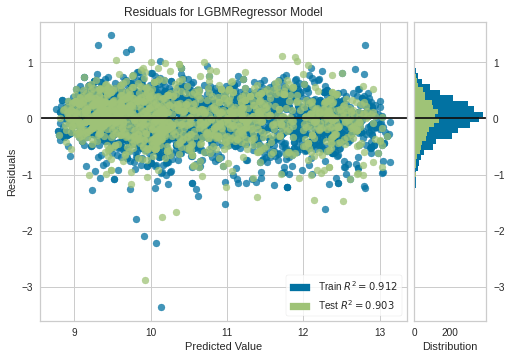

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
#Plotting model
plot_model(tuned_lightgbm)

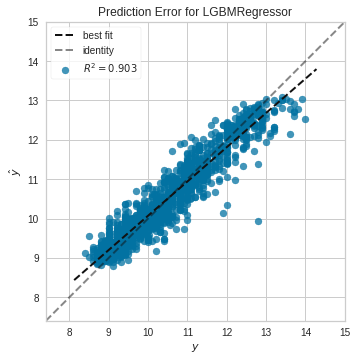

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(tuned_lightgbm, plot = 'error')

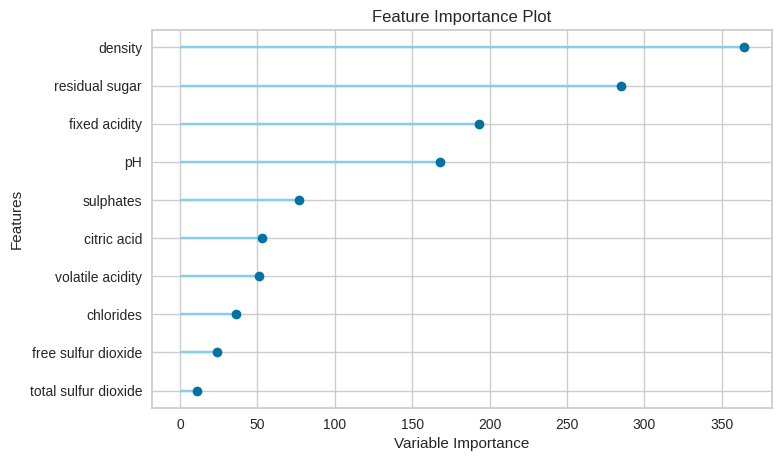

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [31]:
plot_model(tuned_lightgbm, plot='feature')

In [32]:
#Predict Model
predict_model(tuned_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2869,0.1446,0.3802,0.903,0.0326,0.0273


In [33]:
#Finalize model
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples

In [34]:
#Predict with the unseen predictions
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2915,0.1515,0.3893,0.9094,0.0334,0.0275


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,10.463407
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,8.850928
2,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,10.296509
3,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,11.437026
4,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6,10.994897


In [36]:
#Check metric using the actual target column
from pycaret.utils import check_metric
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'R2')

0.9094